In [9]:
import torch
import pickle
import numpy as np
import matplotlib.pyplot as plt

results_44 = pickle.load(open('results/model_8_8_20/epoch_28_total_results.pkl','rb')) #Changed to 28 for a sec
results_61 = pickle.load(open('results/model_8_8_20/epoch_61_total_results.pkl','rb'))
results_99 = pickle.load(open('results/model_8_8_20/epoch_99_total_results.pkl','rb'))
results_prob = pickle.load(open('results/prob_model_8_11_20/prob_results_epoch_30.pkl','rb'))

In [10]:
train_preds_44 = results_44['train_predictions']
test_preds_44 = results_44['test_predictions']
train_times_44 = results_44['train_times']
test_times_44 = results_44['test_times']

train_preds_61 = results_61['train_predictions']
test_preds_61 = results_61['test_predictions']
train_times_61 = results_61['train_times']
test_times_61 = results_61['test_times']

train_preds_99 = results_99['train_predictions']
test_preds_99 = results_99['test_predictions']
train_times_99 = results_99['train_times']
test_times_99 = results_99['test_times']

train_preds_prob = results_prob['train_predictions']
print(type(train_preds_prob), train_preds_prob.shape)
for i in range(len(train_preds_prob)):
    train_preds_prob[i] = torch.sigmoid(train_preds_prob[i])
test_preds_prob = results_prob['test_predictions']
for i in range(len(test_preds_prob)):
    test_preds_prob[i] = torch.sigmoid(test_preds_prob[i])
train_times_prob = results_prob['train_times']
test_times_prob = results_prob['test_times']

vid_names = results_99['test_fullpaths']

<class 'numpy.ndarray'> (800,)


In [11]:
def plot_one(pred_array, title='', crashtime=None):
    times = np.arange(len(pred_array))*0.1+0.9
    plt.ylim(-0.2,1.2)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.plot(times, pred_array)
    plt.plot(times, np.zeros(len(pred_array)))
    plt.plot(times, 0.5*np.ones(len(pred_array)))
    plt.plot(times, np.ones(len(pred_array)))
    if crashtime is not None and crashtime > 0:
        plt.vlines(crashtime, -1, 2)
    plt.show()

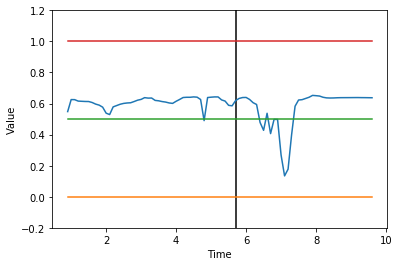

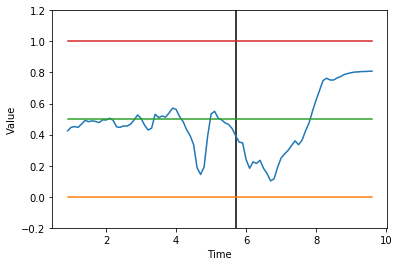

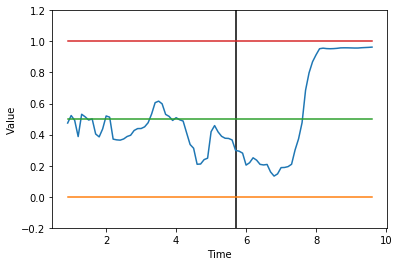

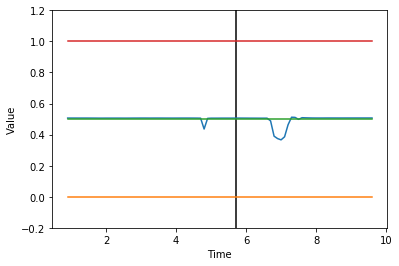

In [24]:
ind = 82
plot_one(test_preds_44[ind].cpu().numpy(), crashtime=test_times_44[ind])
plot_one(test_preds_61[ind].cpu().numpy(), crashtime=test_times_61[ind])
plot_one(test_preds_99[ind].cpu().numpy(), crashtime=test_times_99[ind])
plot_one(test_preds_prob[ind].cpu().numpy(), crashtime=test_times_prob[ind])

In [12]:
def plot_several(array, times, name, number, inc=5):
    title_prefix = name+'_epoch_'+str(number)+'_vid_'
    for i in range(0,len(array),inc):
        plot_one(array[i].cpu().numpy(), title=title_prefix+str(i), crashtime=times[i])

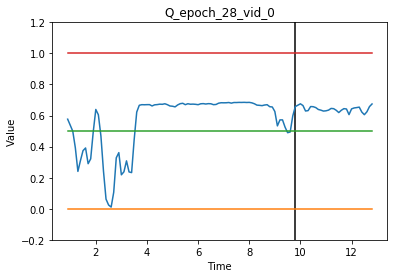

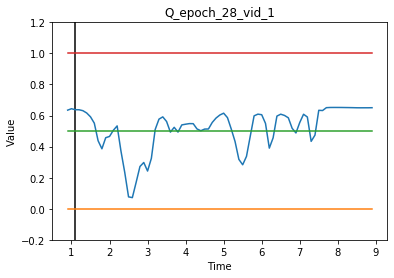

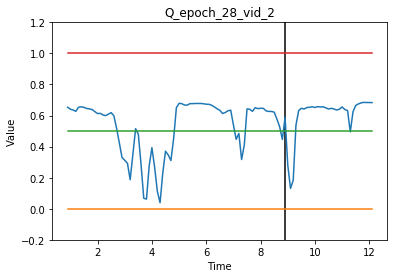

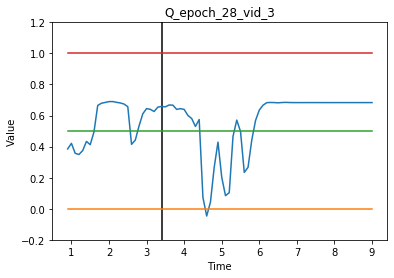

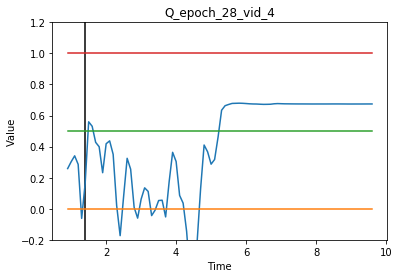

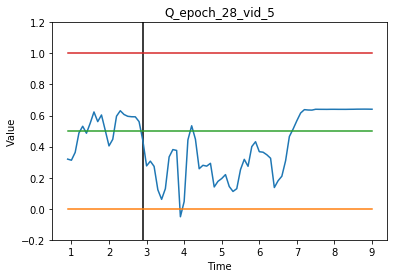

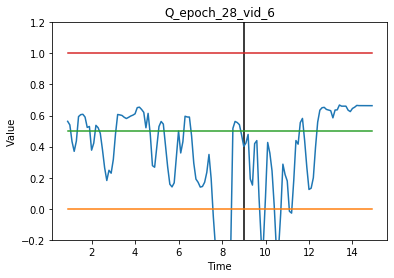

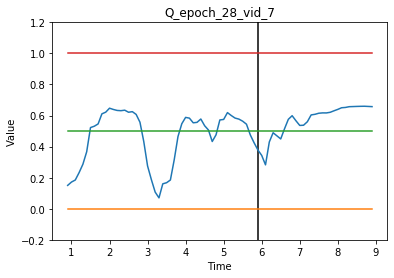

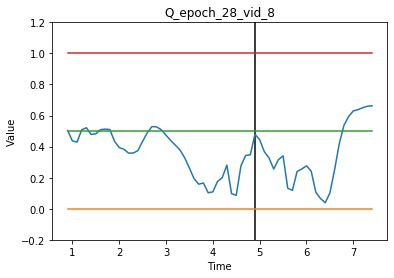

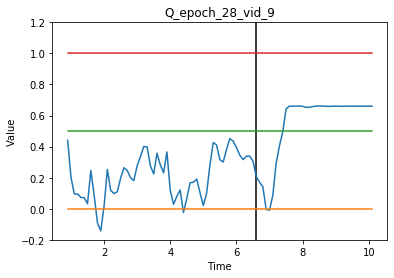

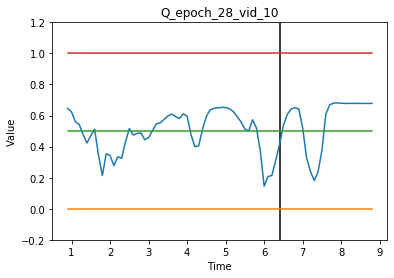

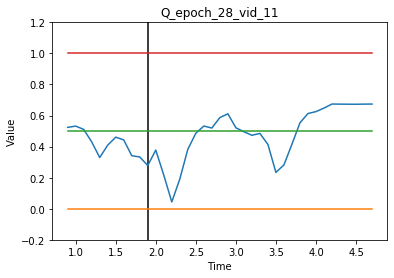

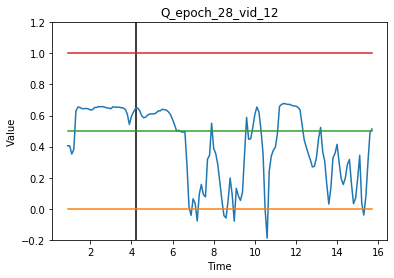

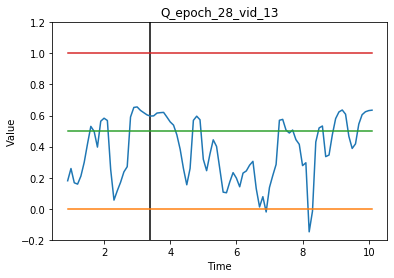

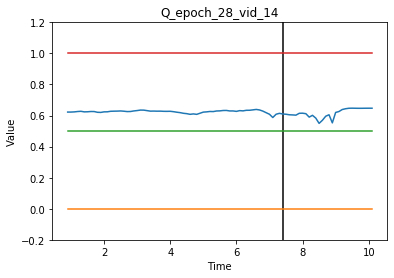

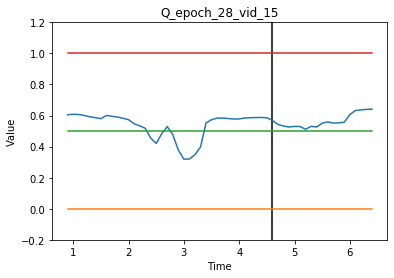

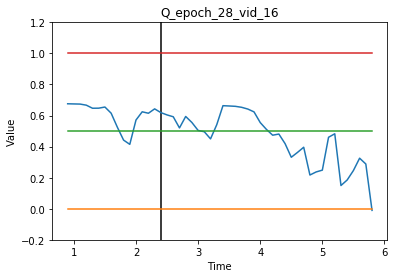

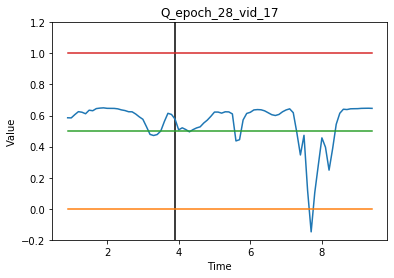

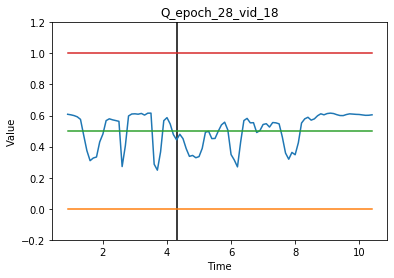

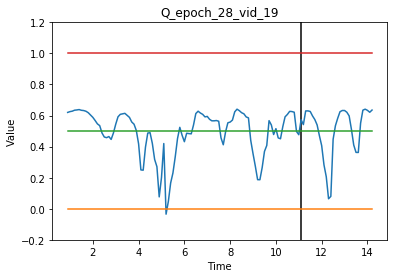

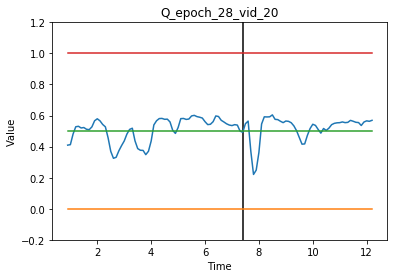

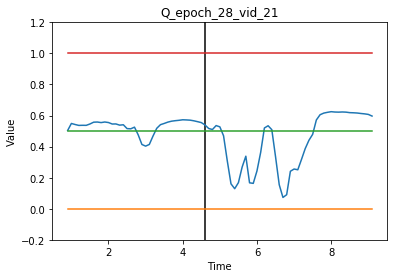

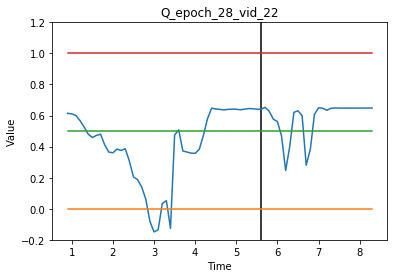

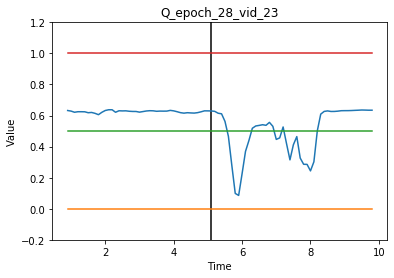

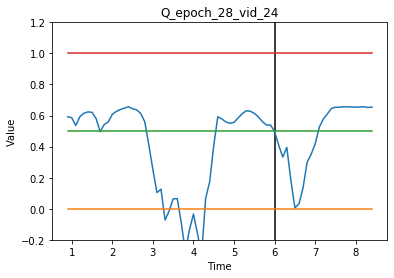

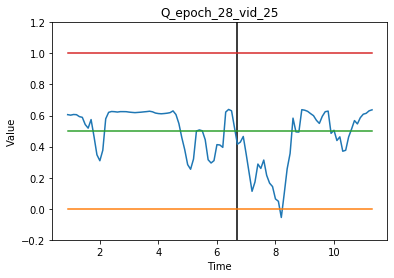

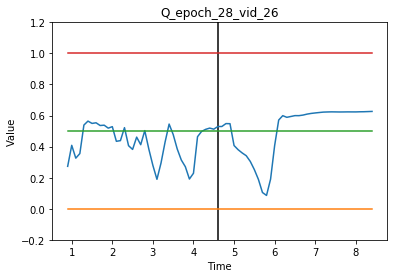

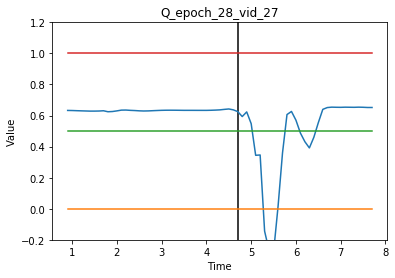

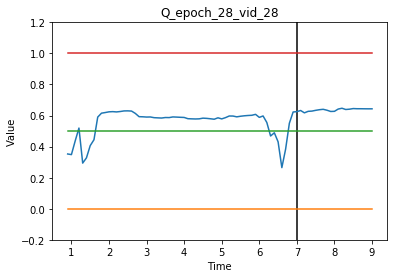

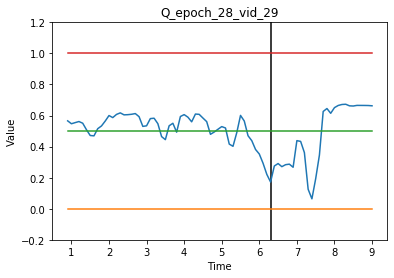

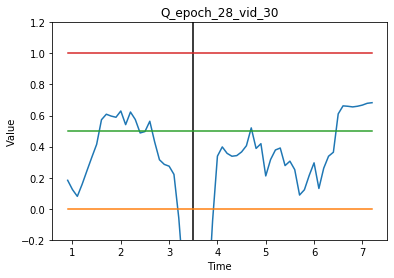

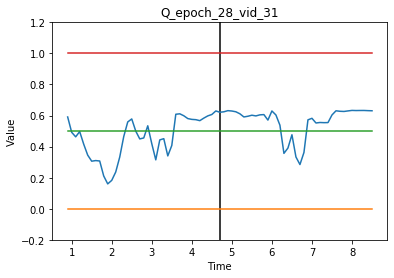

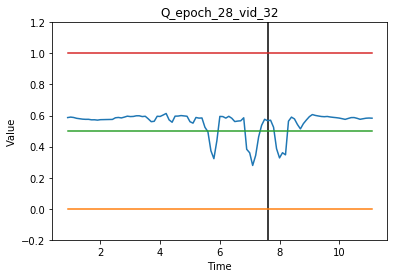

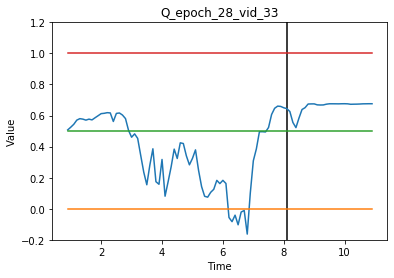

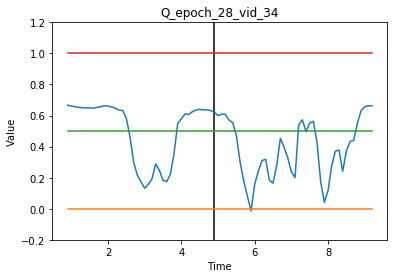

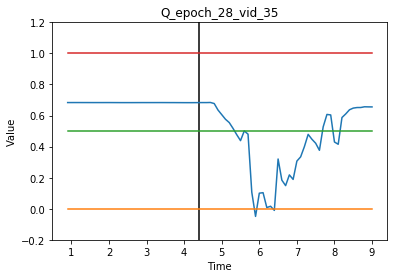

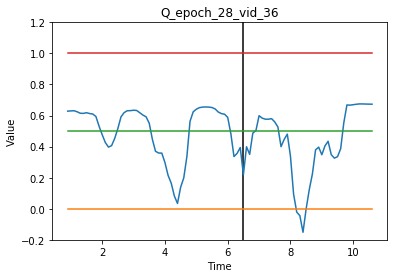

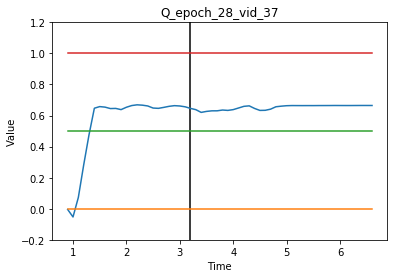

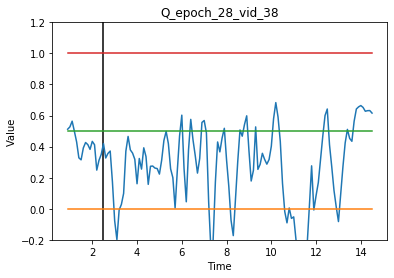

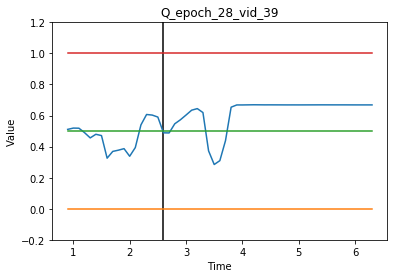

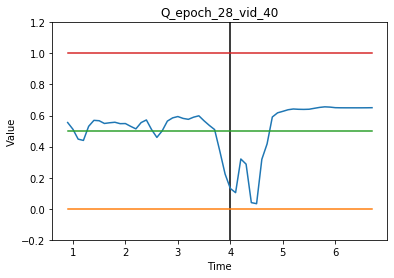

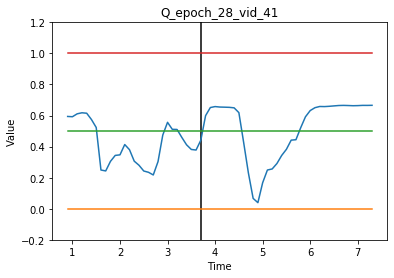

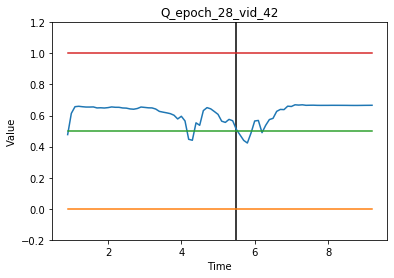

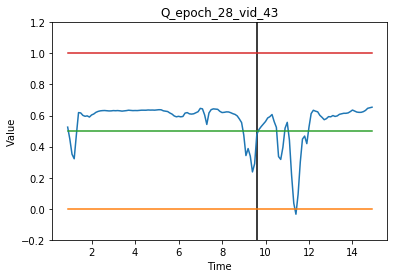

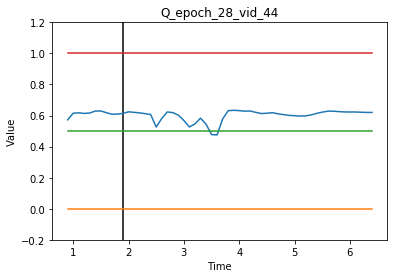

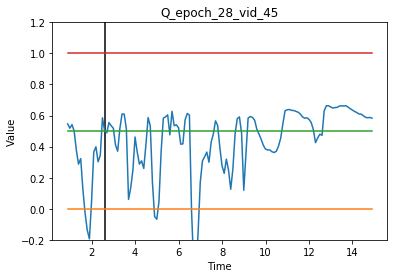

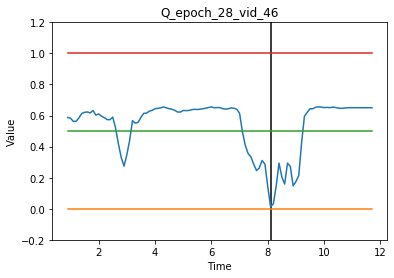

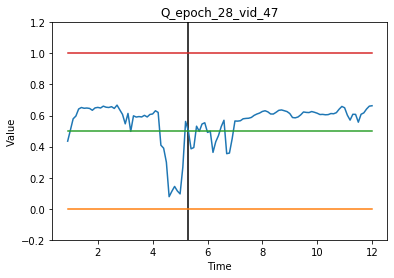

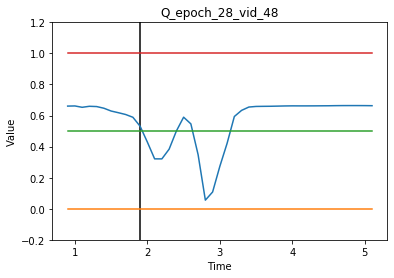

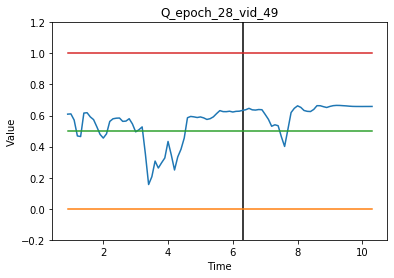

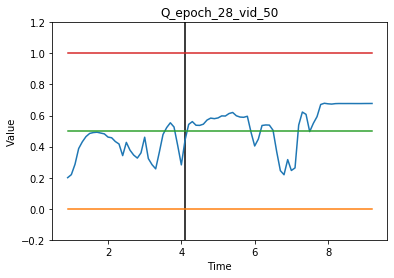

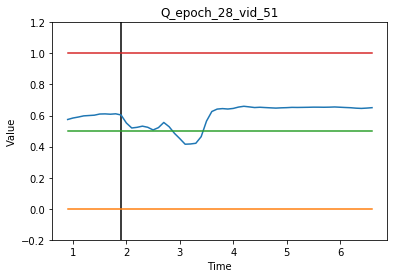

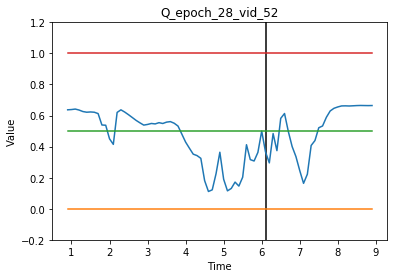

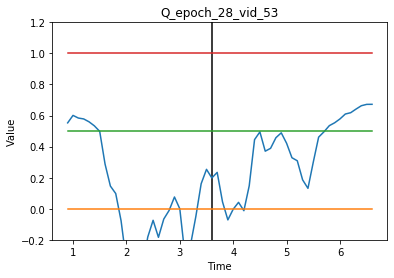

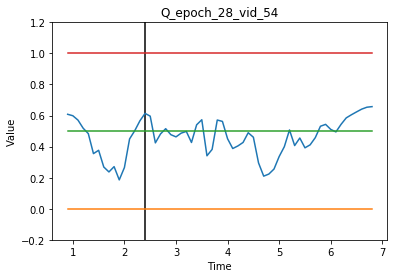

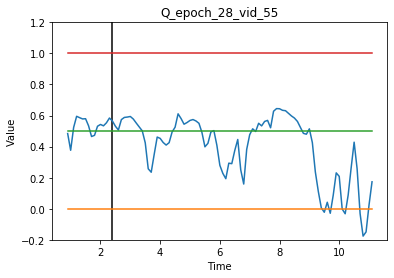

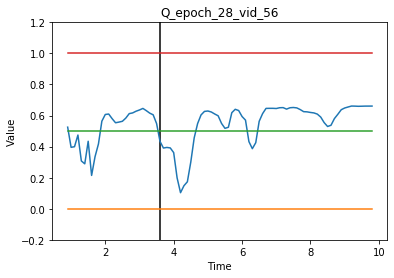

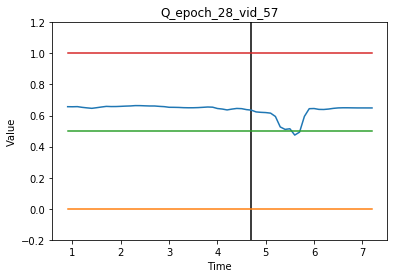

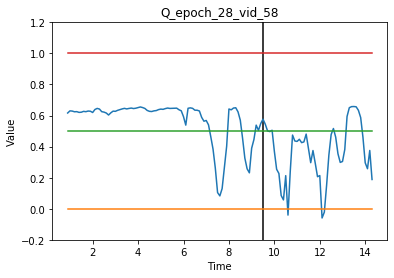

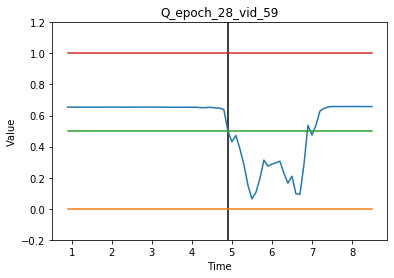

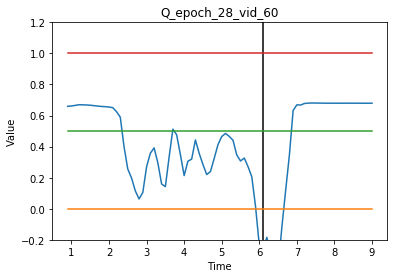

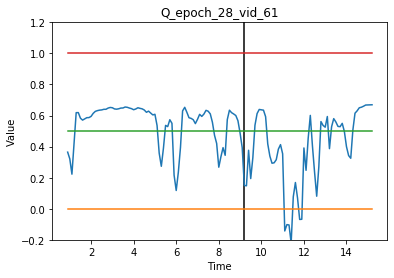

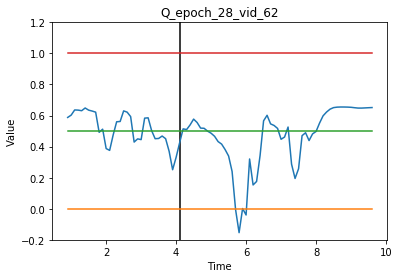

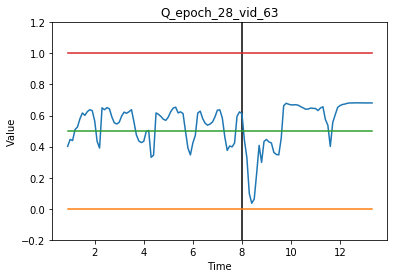

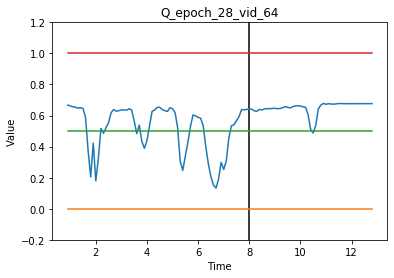

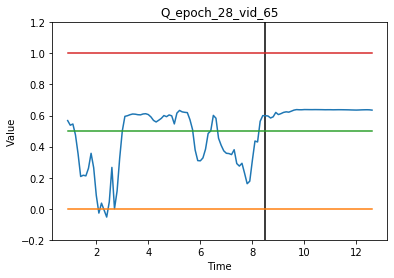

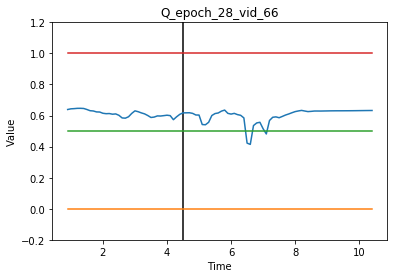

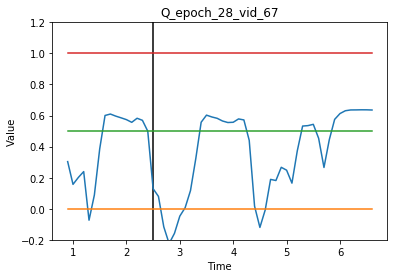

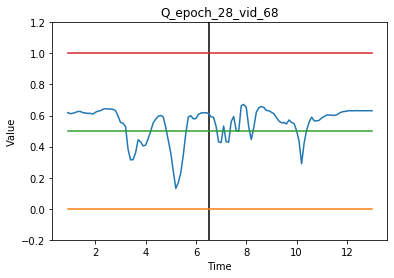

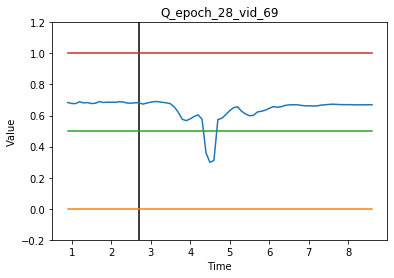

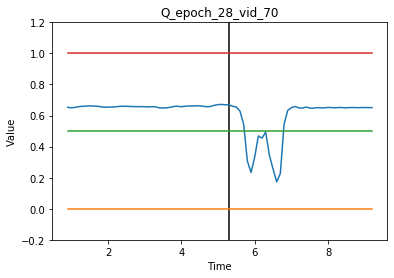

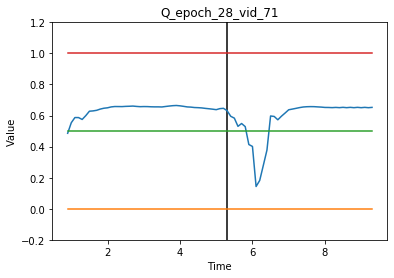

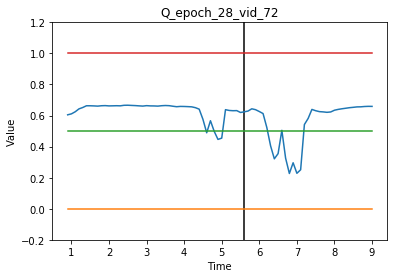

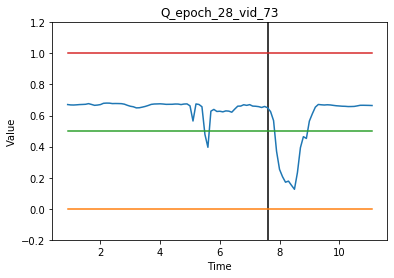

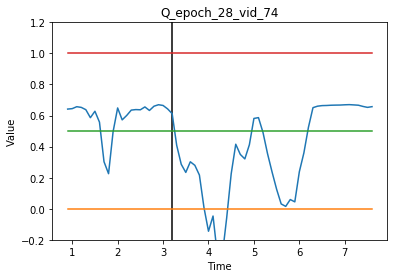

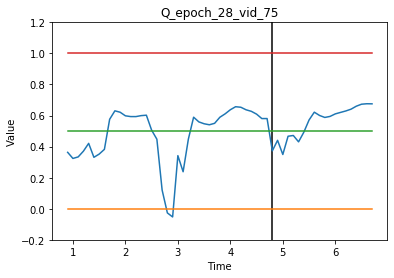

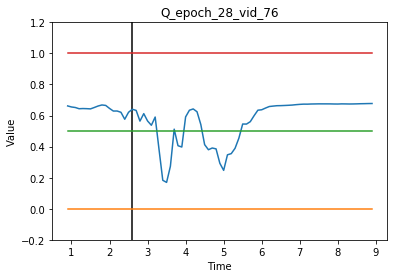

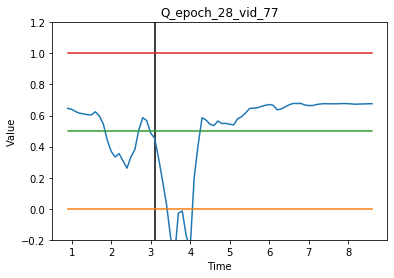

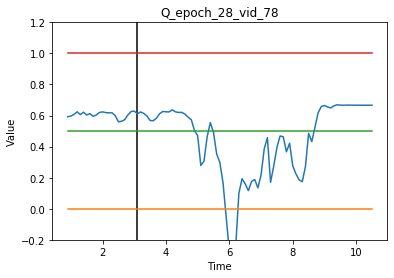

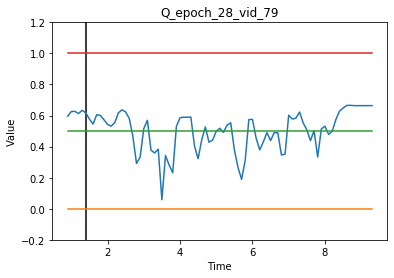

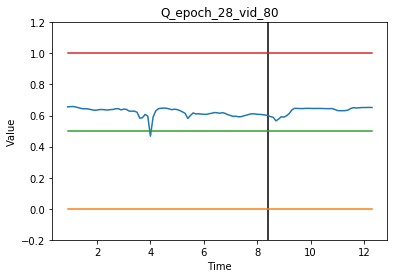

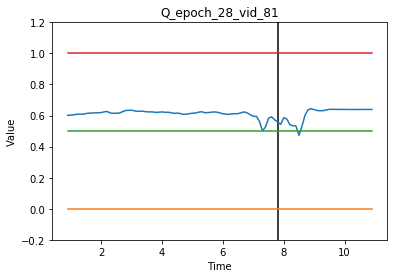

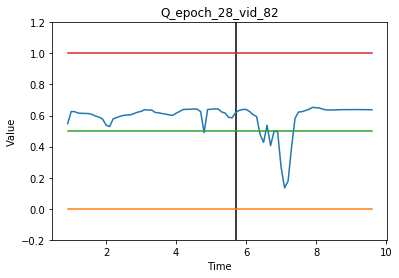

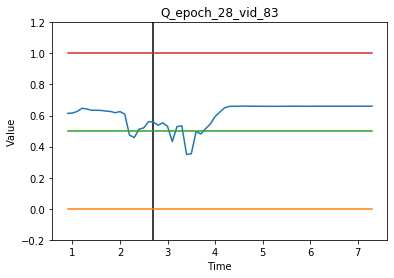

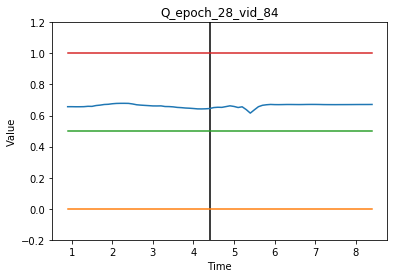

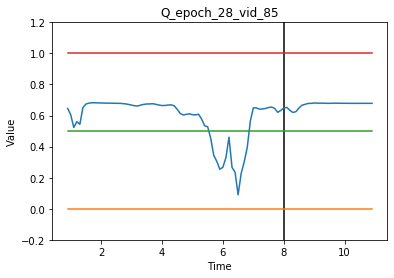

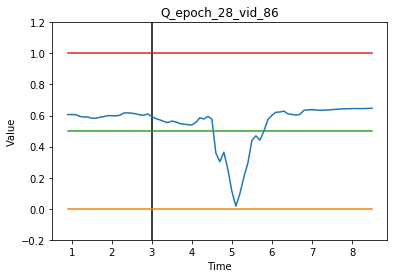

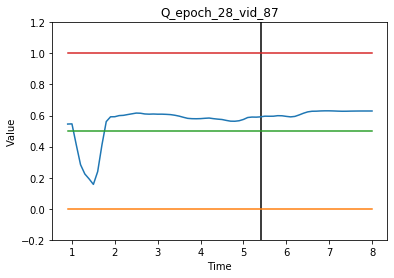

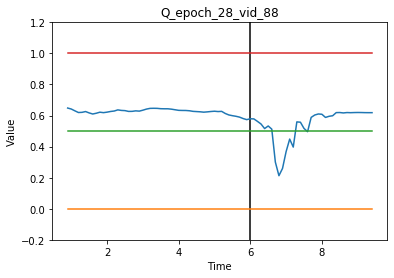

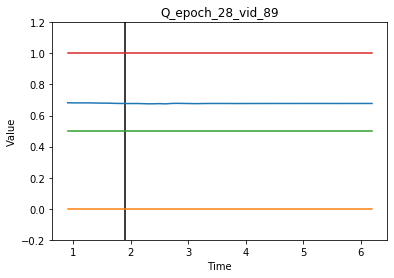

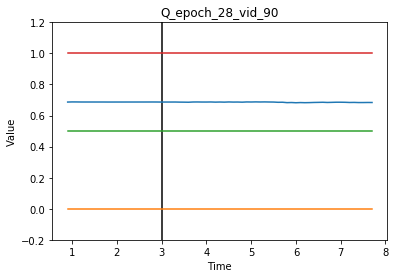

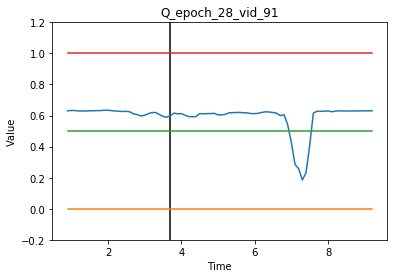

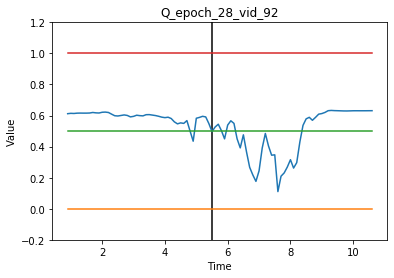

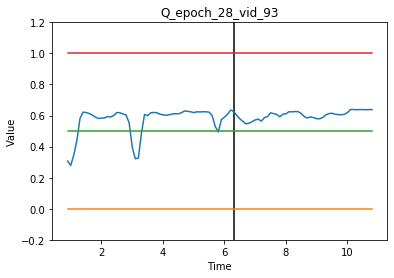

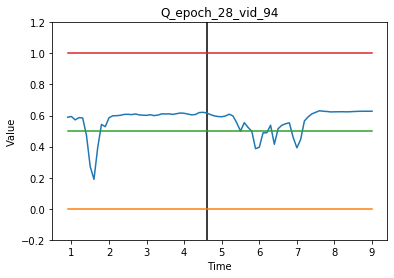

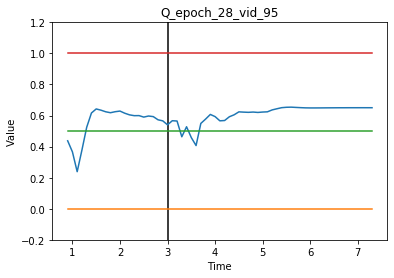

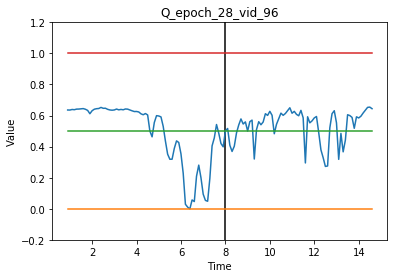

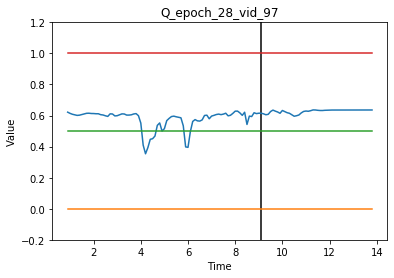

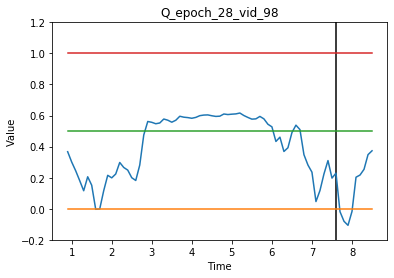

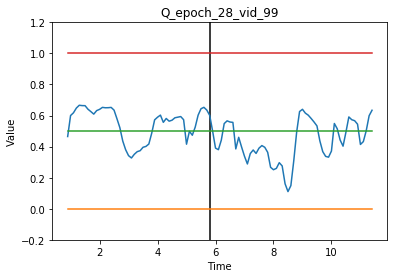

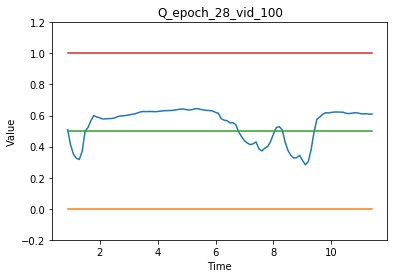

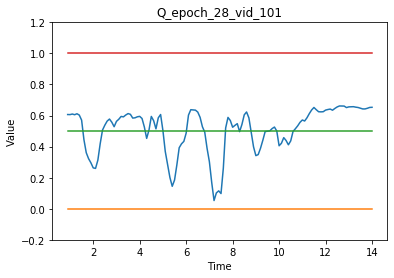

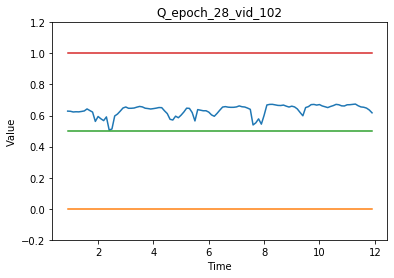

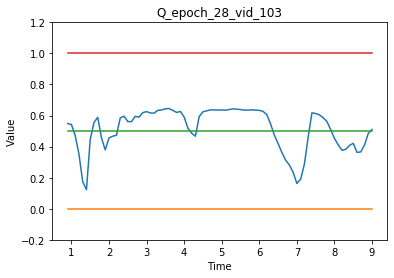

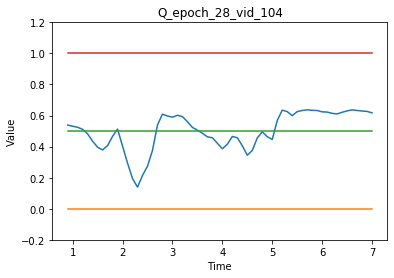

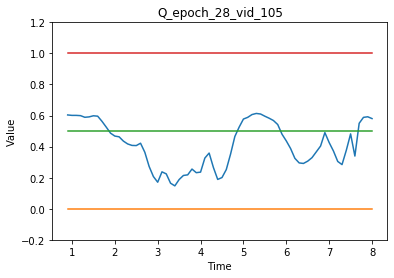

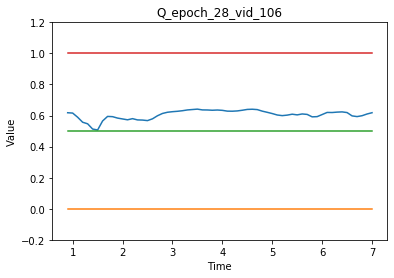

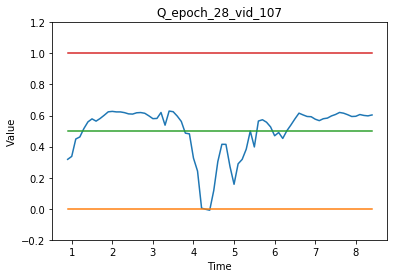

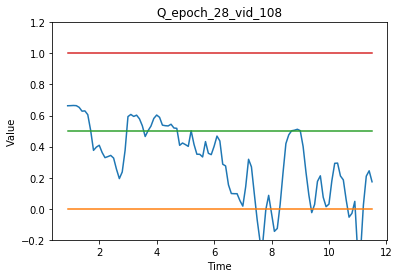

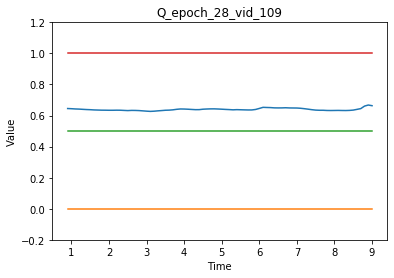

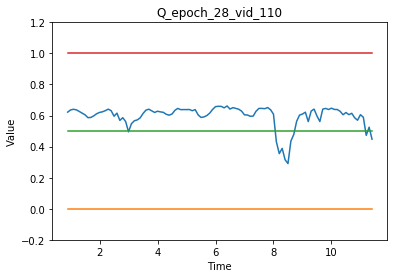

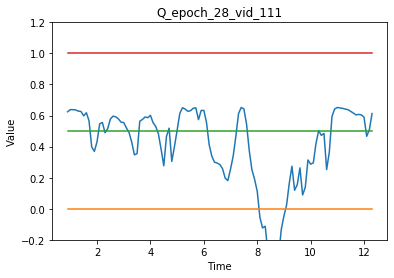

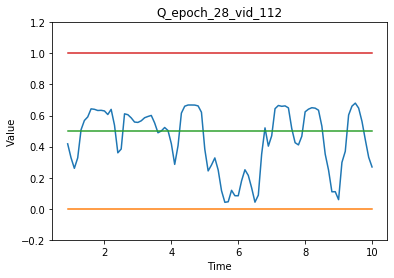

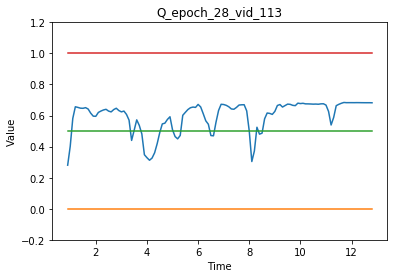

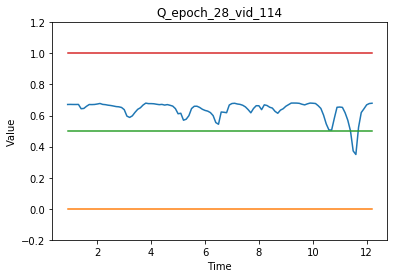

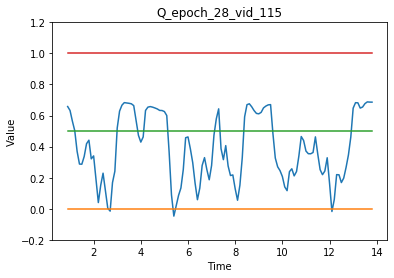

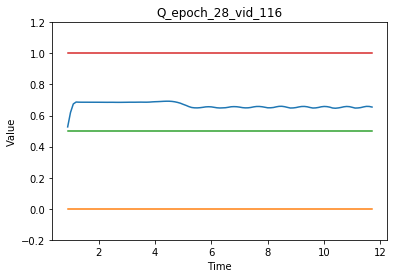

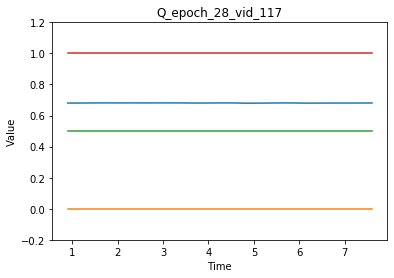

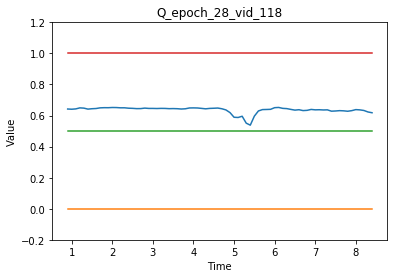

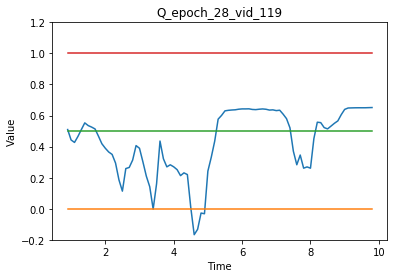

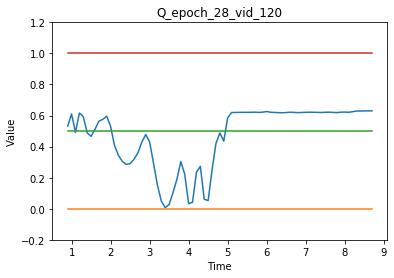

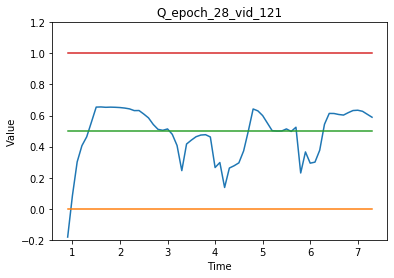

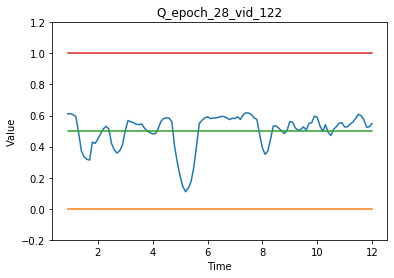

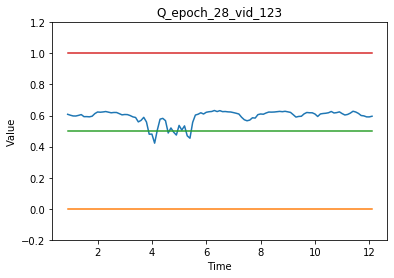

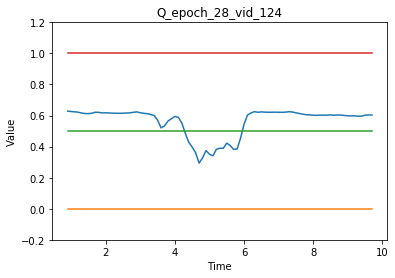

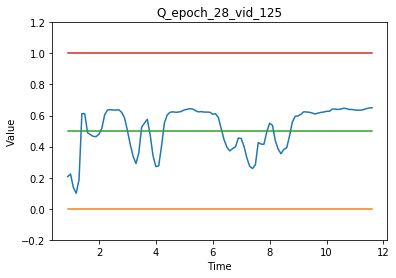

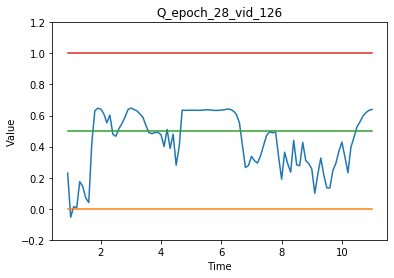

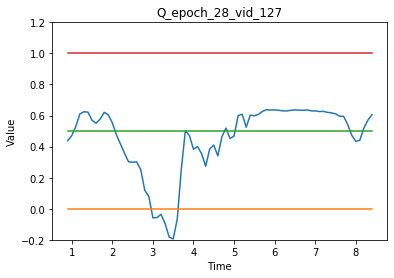

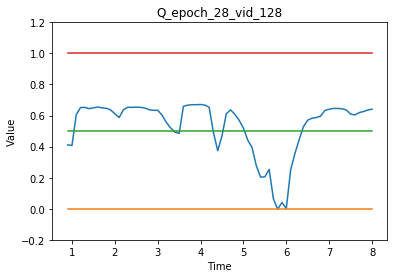

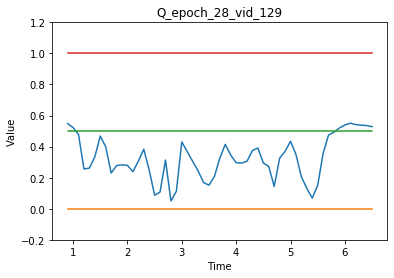

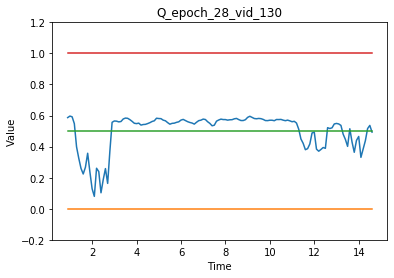

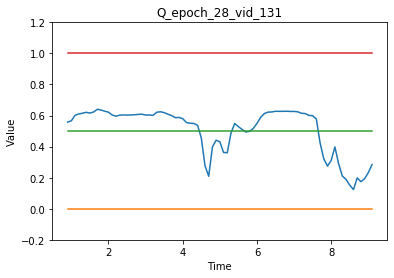

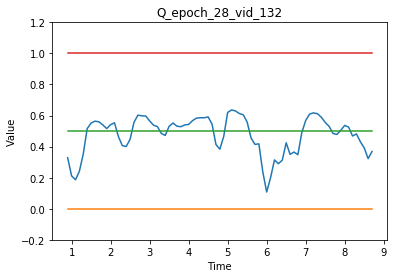

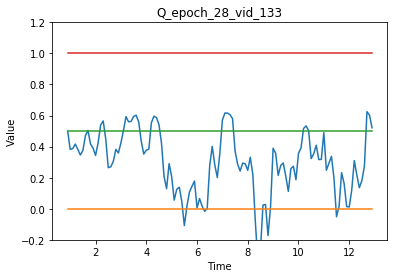

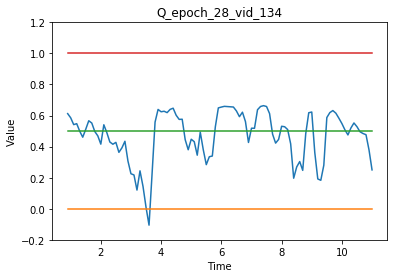

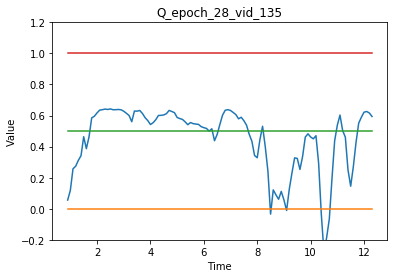

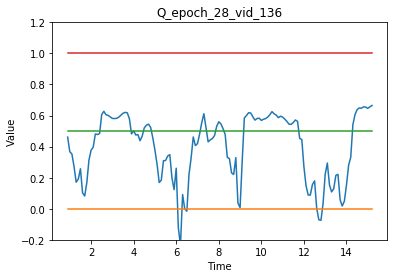

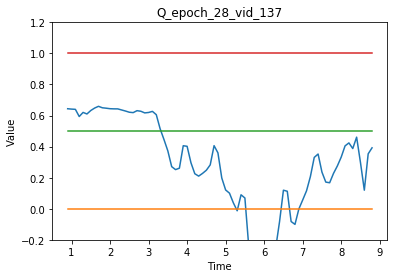

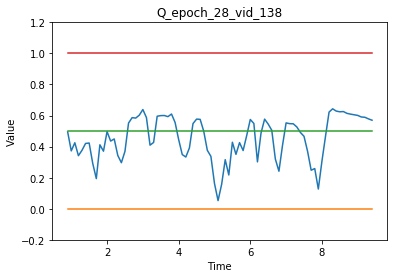

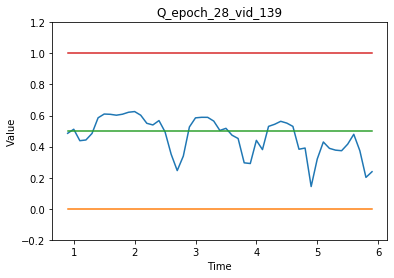

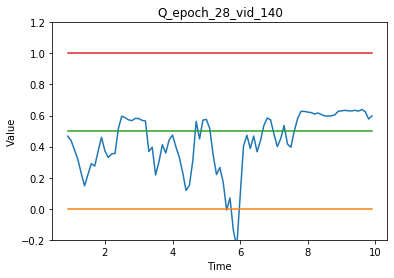

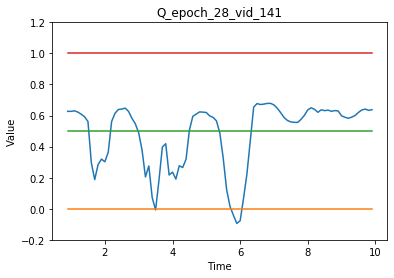

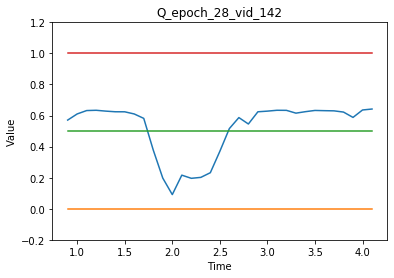

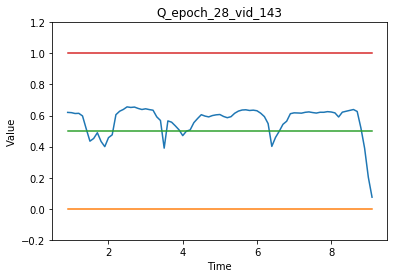

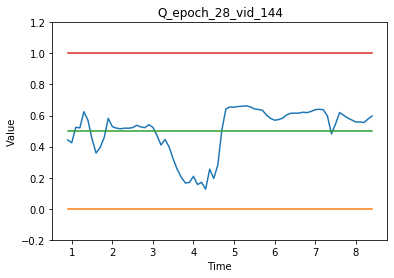

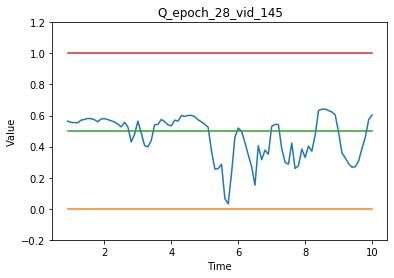

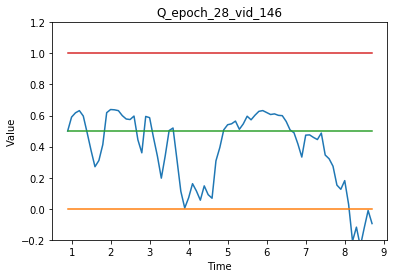

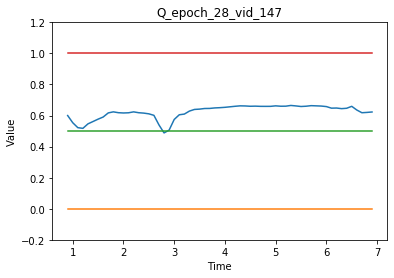

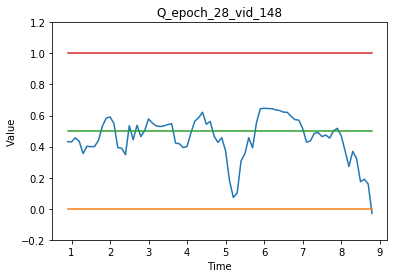

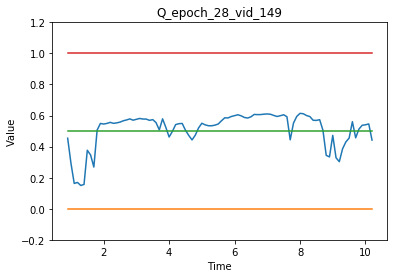

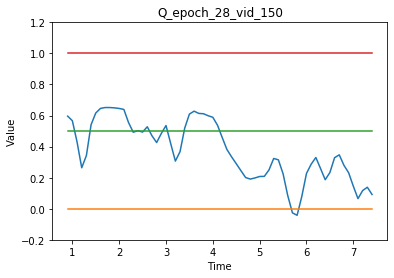

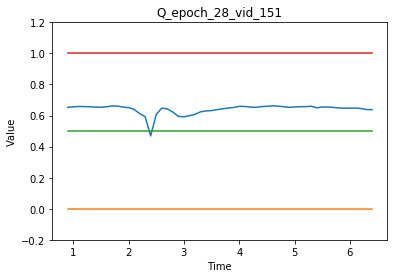

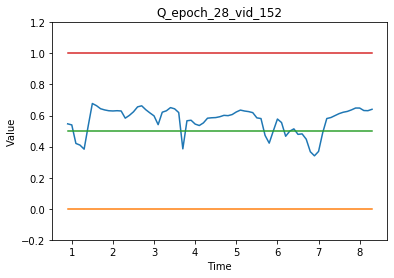

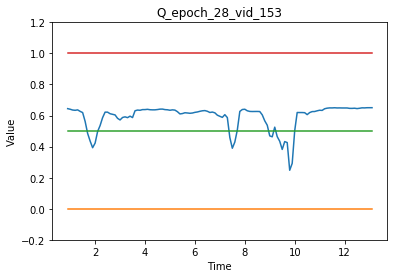

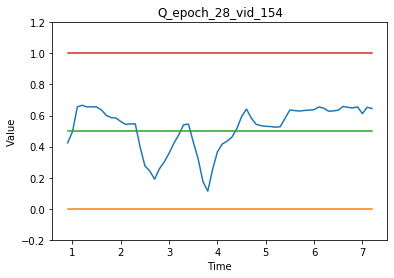

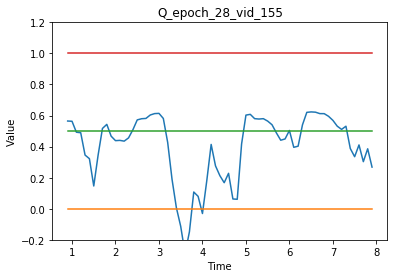

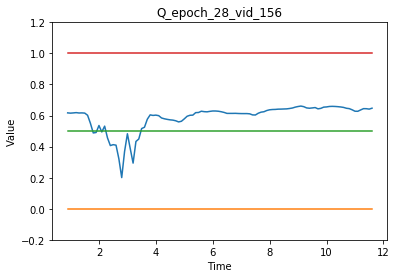

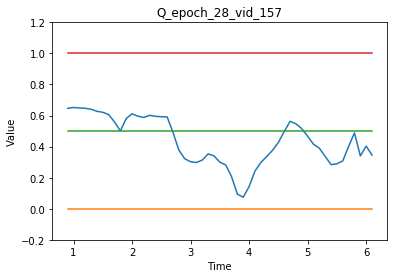

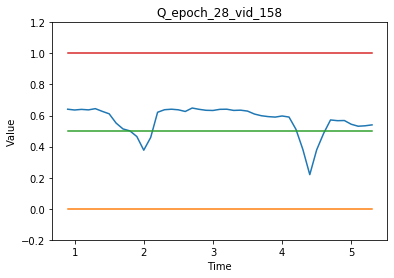

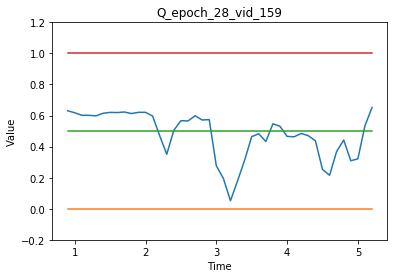

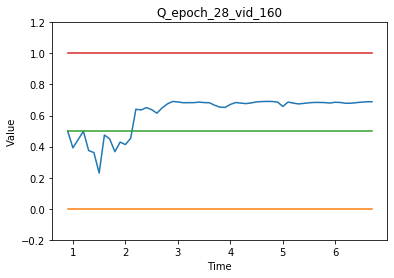

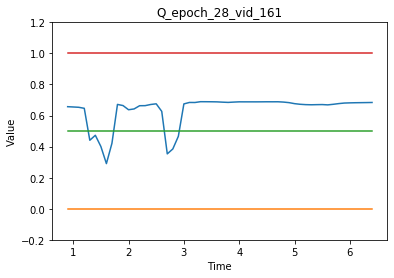

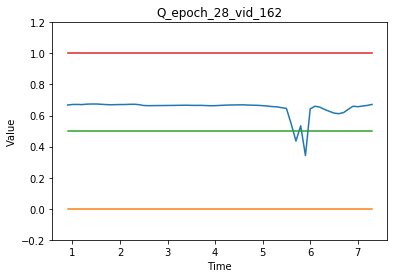

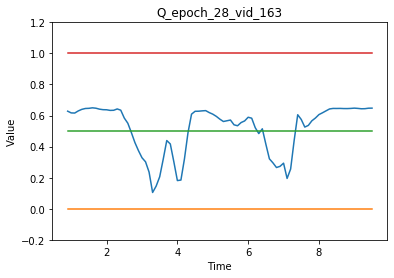

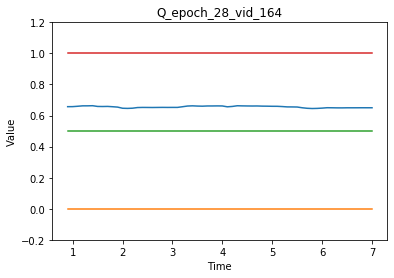

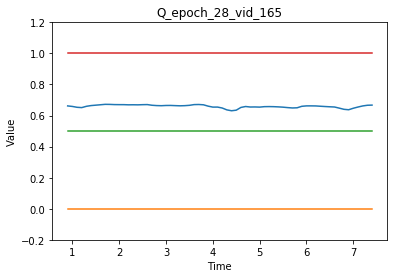

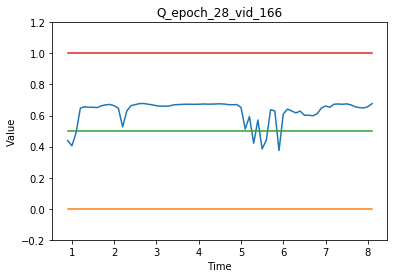

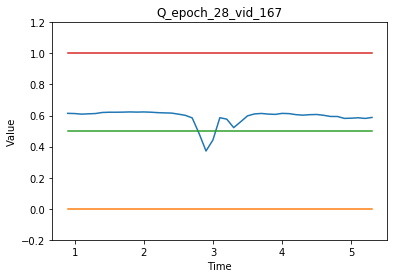

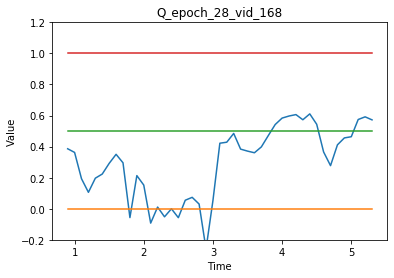

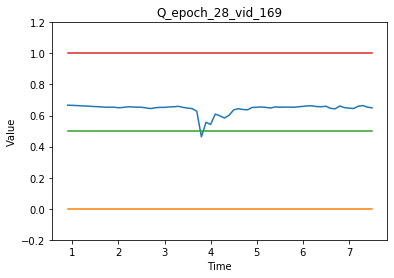

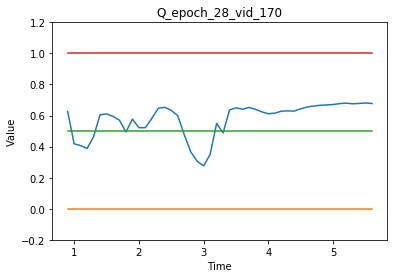

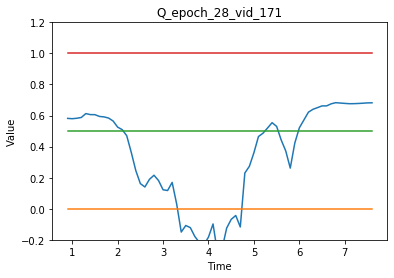

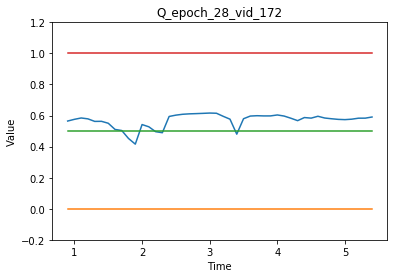

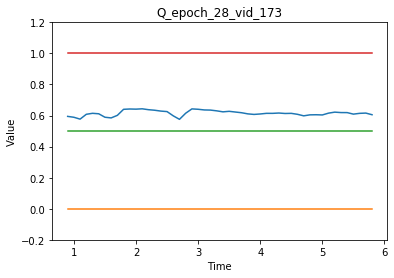

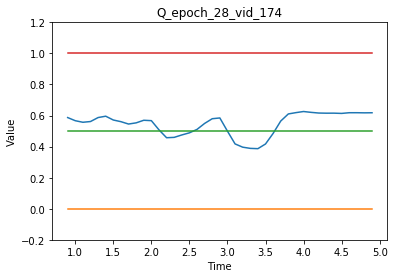

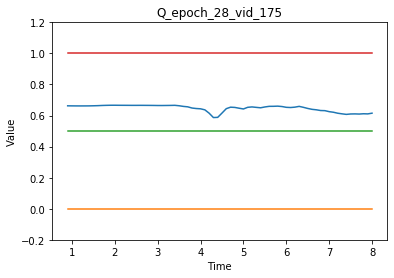

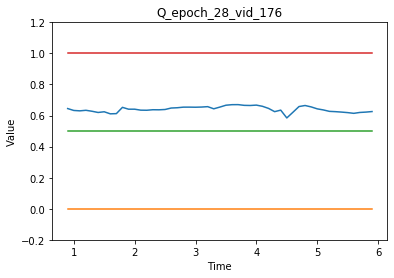

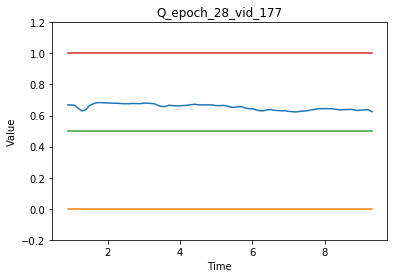

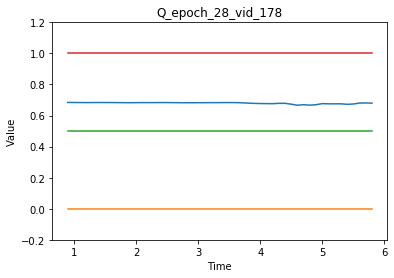

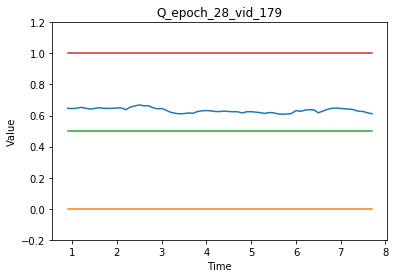

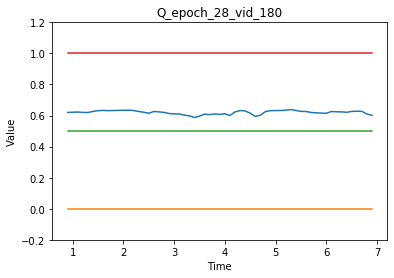

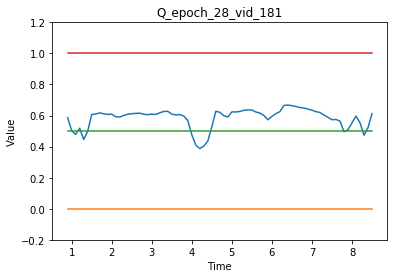

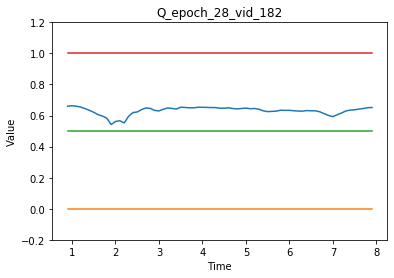

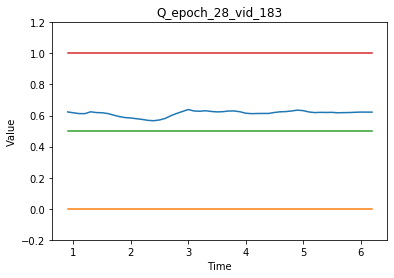

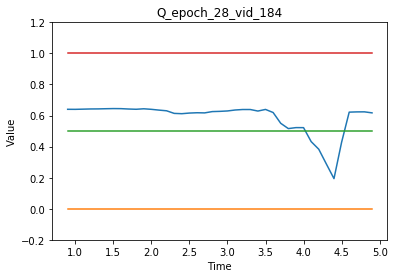

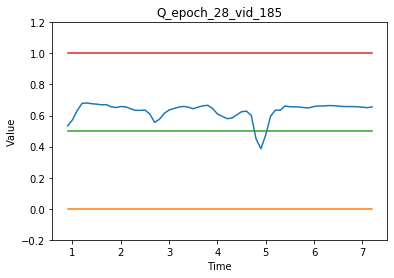

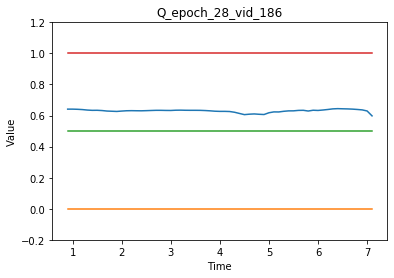

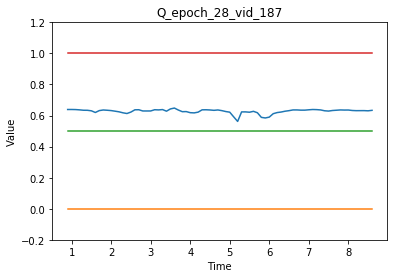

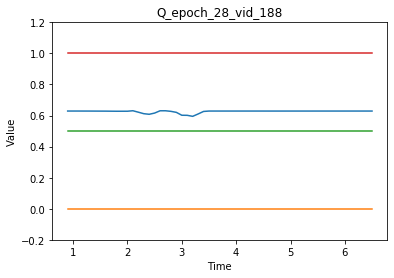

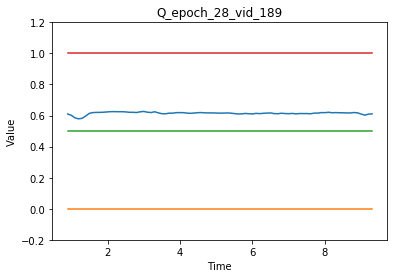

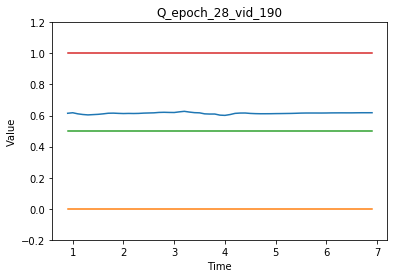

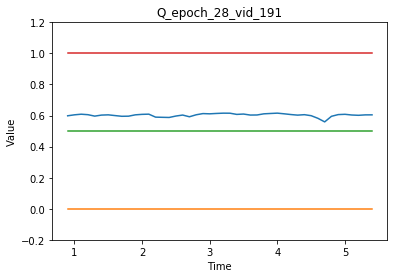

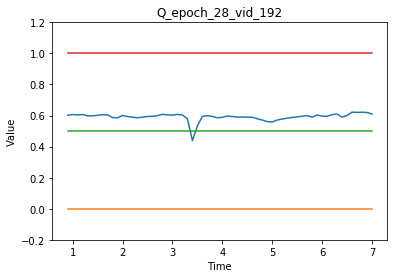

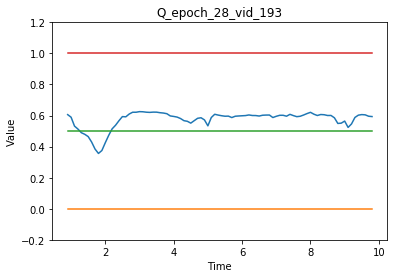

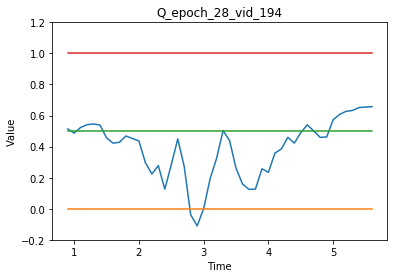

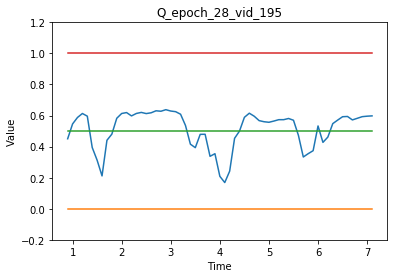

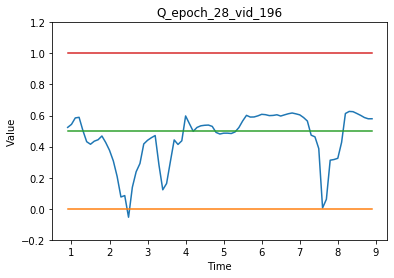

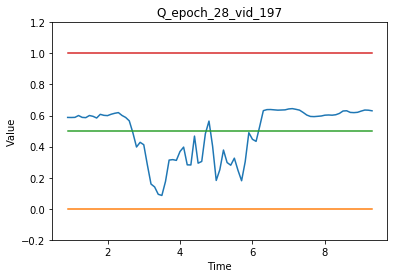

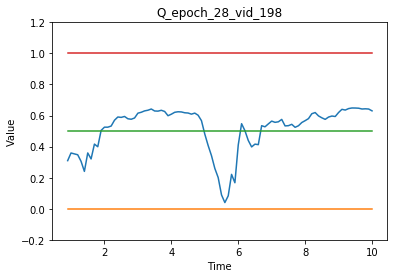

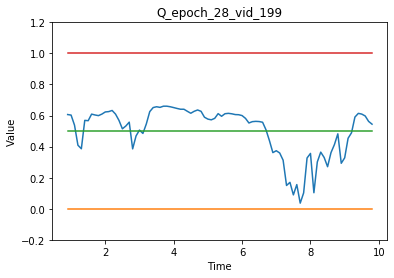

In [13]:
plot_several(test_preds_44, test_times_44, 'Q', 28, inc=1)

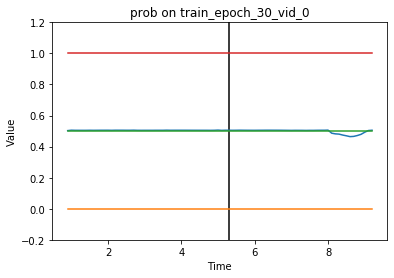

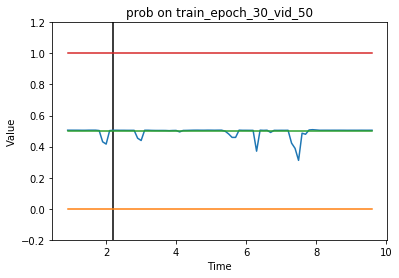

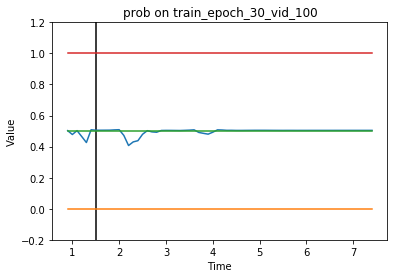

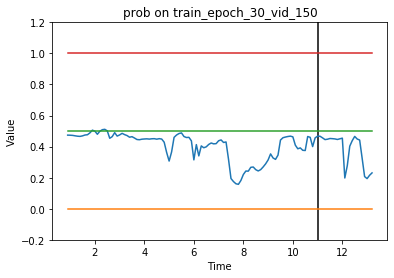

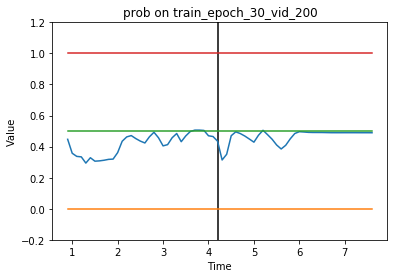

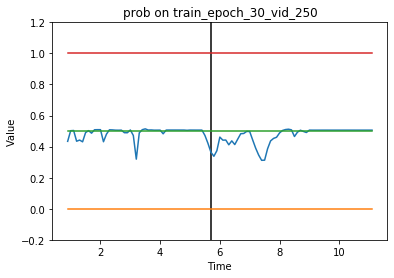

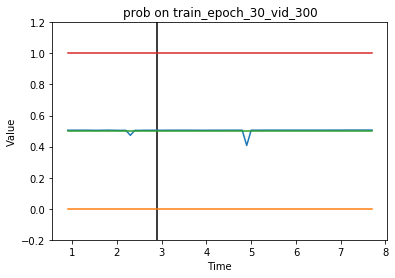

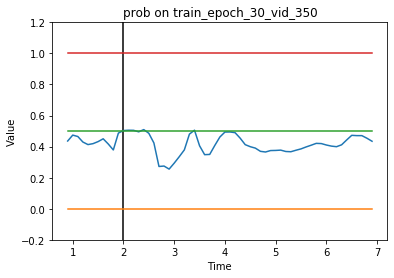

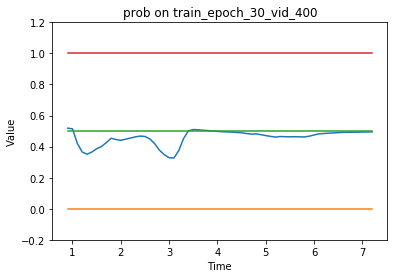

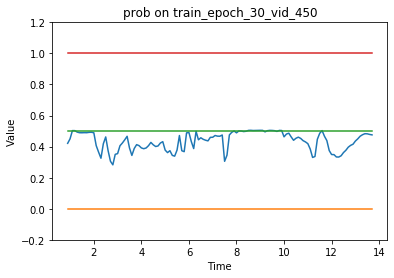

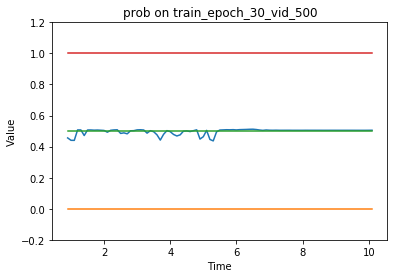

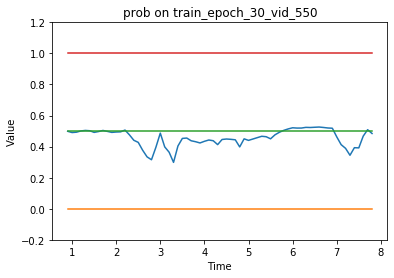

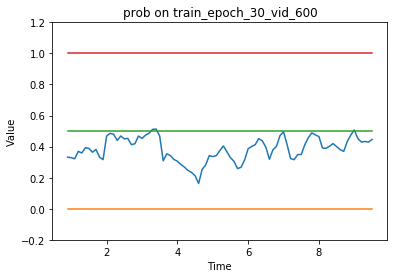

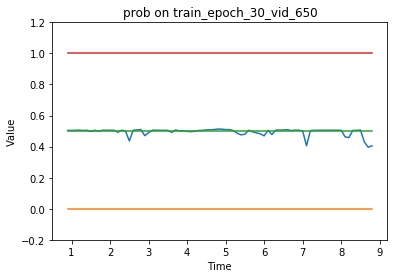

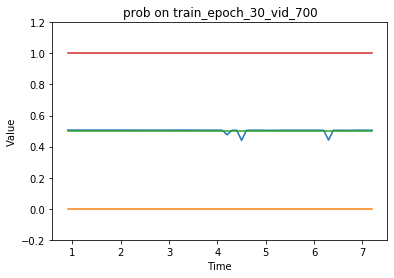

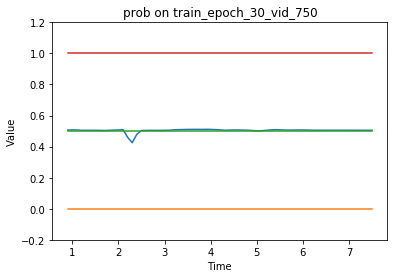

In [7]:
plot_several(train_preds_44, train_times_44, 'prob on train', 30, inc=50)

In [246]:
vid_names[50]

'/mnt/linuxshared/data/BeamNG/positive/pos_255.mp4'